# Project: Sleeping Quality
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">ML Modeling</a></li> **Work in Progress**
<li><a href="#re">Results of Project</a></li>


</ul>

<a id='intro'></a>
## Introduction

**Our sleeping quality indicators: **

*Score indices* : **0 ----> no difficulty** to **3 ----> severe difficulty**
- hours of sleep

 $\gt$ 7 hours = 0 score
 °°° 6-7 hours = 1 score
 °°° 5-6 hours = 2 score
 °°° $\lt$ 5 hours = 3 score

- time falling asleep 

 $\lt$ 15 minutes = 0 score
 °°° 16-30 minutes = 1 score
 °°° 31-60 minutes = 2 score
 °°° $\gt$ 60 minutes = 3 score

- times of waking at night

 $\lt$ 2 times = 0 score
°°° 2 times =  1 score
 °°° 3 times = 2 score 
 °°° $\gt$ 4 times = 3 score


** What we want to analyze / visualize: ** 
                                                                                                          
- A general overview of the situation of the students at the beginning of the study (visualisation of 1st survey's results)

- The individual evolution of sleeping quality (is it getting better, worse or the same?)

- The correlation between sleeping quality and others parameters ('alone','have pet', 'screen time','stress level', 'time outside', 'meeting friends') 
---Can we find a correlation somewhere or not? (Heatmap)

- The correlation between sleeping quality's parameters ('hours of sleep', 'time fall asleep','times of wake) and other parameters (same than above)

<a id='wrangling'></a>
## Data Wrangling

> After uploading the data, We will perform the clearing, deleting, editing and explore operations in this section in order to get it ready for analysis. Therefore, We need some important libraries which are has been imported at below.

In [36]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import datetime

In [115]:
# Read Data from the main survey
df = pd.read_csv("Main_Survey1.csv")

In [93]:
df.shape

(18, 22)

In [6]:
# To anonymise the participants
df['Email Address'] = range(1, 1+len(df))
df.head()

Timestamp Your age / Votre âge  \
0  12/2/2020 15:32:03              23 - 27   
1  12/2/2020 19:32:50              23 - 27   
2  12/2/2020 21:13:46              23 - 27   
3  12/3/2020 10:37:53              18 - 22   
4  12/3/2020 13:42:33              18 - 22   

  To which gender do you identify? / A quel genre vous identifiez-vous ?  \
0                                     Female / Femme                       
1                                     Female / Femme                       
2                                       Male / Homme                       
3                                     Female / Femme                       
4                                     Female / Femme                       

  Your current student status / Votre niveau d'étude actuel  \
0                                             Master          
1                                             Master          
2                                     PhD / Doctorat          
3                                             Master          
4                                             Master          

  Are you a CRI student? / Etes-vous étudiant au CRI ?   \
0                                                Yes      
1                                                Yes      
2                                                 No      
3                                                Yes      
4                                                Yes      

   You are currently studying/working  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

  Are you living alone? / Vivez-vous seul ?   If NO, with...  \
0                                   No / Non             NaN   
1                                  Yes / Oui             NaN   
2                                   No / Non             NaN   
3                                  Yes / Oui             NaN   
4                                   No / Non             NaN   

  Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?   \
0                                           No / Non                               
1                                           No / Non                               
2  Yes and it doesn't require to go out / Oui, un...                               
3                                           No / Non                               
4                                           No / Non                               

   How many hours do you spend daily in front of a screen (TV, PC, phone...) (average)? / Combien d'heures passez-vous chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?   \
0                                                8.0                                                                                                                                                       
1                                                7.0                                                                                                                                                       
2                                                9.0                                                                                                                                                       
3                                               12.0                                                                                                                                                       
4                                               10.0                                                                                                                                                       

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  On average, when do you wake up? / En moyenne, à quelle heure vous réveillez-vous ?   \
0                              

##  Main survey : Questions asked
Asked on both languages (ENG/FR)

In [116]:
list_col = df.columns.tolist()
list_col

['Timestamp',
 'Your age / Votre âge',
 'To which gender do you identify? / A quel genre vous identifiez-vous ?',
 "Your current student status / Votre niveau d'étude actuel",
 'Are you a CRI student? / Etes-vous étudiant au CRI ? ',
 'You are currently studying/working',
 'Are you living alone? / Vivez-vous seul ? ',
 'If NO, with...',
 'Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ? ',
 "How many hours do you spend daily in front of a screen (TV, PC, phone...) (average)? / Combien d'heures passez-vous chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ? ",
 'On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ? ',
 'On average, when do you go to bed? / En moyenne, à quelle heure vous couchez-vous ? ',
 'On average, when do you wake up? / En moyenne, à quelle heure vous réveillez-vous ? ',
 "How many hours do you spend outside dai

In [126]:
# Rename columns names for clearer/easy data wrangling

column_name = ['time', 'age','gender', 'education_level', 'cri_student', 'd0', 
                'alone', 'd1','have_pet', 'screen_time','stress_level', 'sleep_time','wake_time',
                'time_outside','meeting_friends','d2', 'times_of_wake', 'in_france',
                'd3','agrement','email','time_fall_asleep' ]


res = {list_col[i]: column_name[i] for i in range(len(list_col))} 
df = df.rename(columns=res)

In [41]:
df.columns

Index(['time', 'age', 'gender', 'education_level', 'cri_student', 'd0',
       'alone', 'd1', 'have_pet', 'screen_time', 'stress_level', 'sleep_time',
       'wake_time', 'time_outside', 'meeting_friends', 'd2', 'times_of_wake',
       'in_france', 'd3', 'agrement', 'email', 'time_fall_asleep'],
      dtype='object')

In [42]:
# drop empty columns
df = df.drop(['d0', 'd1','d2','d3'], axis = 1)

In [43]:
df = df.drop(['time','agrement'], axis = 1)

In [44]:
# checking for null values in comarison to our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               55 non-null     object 
 1   gender            55 non-null     object 
 2   education_level   55 non-null     object 
 3   cri_student       55 non-null     object 
 4   alone             55 non-null     object 
 5   have_pet          55 non-null     object 
 6   screen_time       55 non-null     float64
 7   stress_level      55 non-null     object 
 8   sleep_time        55 non-null     object 
 9   wake_time         55 non-null     object 
 10  time_outside      55 non-null     int64  
 11  meeting_friends   55 non-null     int64  
 12  times_of_wake     55 non-null     int64  
 13  in_france         55 non-null     object 
 14  email             55 non-null     object 
 15  time_fall_asleep  55 non-null     object 
dtypes: float64(1), int64(3), object(12)
memory usa

In [117]:
df.shape

(55, 22)

> *Our main dataframe is ready for analysis*, **However**, before passing to analyze, we will arrange weekly dataframes and once we finish fixing/cleaning the weekly dataframes, we will connect with our main survey.

### Loading weekly surveys csv + Filter of data based on continuing participants.

In [101]:
# Reading weekly data
df_week1 = pd.read_csv("Weekly_form.csv")
df_week2 = pd.read_csv("Weekly_form_2.csv")
df_week3 = pd.read_csv("Weekly_form_3.csv")

In [102]:
df_week1 = df_week1.drop(['Timestamp'], axis = 1)
df_week2 = df_week2.drop(['Timestamp'], axis = 1)
df_week3 = df_week3.drop(['Timestamp'], axis = 1)

In [103]:
# to anonymise data
df_week1['Username'] = range(1, 1+len(df_week1))
df_week2['Username'] = range(1, 1+len(df_week2))
df_week3['Username'] = range(1, 1+len(df_week3))

## Weekly Surveys  : Questions asked
6 questions to follow up on the 3 upcoming weeks after main survey (asked on both languages (ENG/FR))

In [104]:
list_col_week = df_week1.columns.tolist()
list_col_week

['Username',
 "DAILY - How many hours did you spend in front of a screen (TV, PC, phone...)? / Combien d'heures avez-vous passé chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ? ",
 'On average, when did you go to bed? / En moyenne, à quelle heure vous êtes-vous couché.e ? ',
 'On average, when did you wake up? / En moyenne, à quelle heure vous êtes-vous réveillé.e? ',
 'On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressé.e cette semaine ? ',
 'On average, how many times did you wake up while sleeping every night? / En moyenne, à quelle fréquence vous êtes-vous réveillé.e la nuit ? ',
 'On average, how long did it take to fall asleep? / En moyenne, combien de temps avez-vous mis à vous endormir ? ']

In [127]:
# Rename columns

column_name = ['email','screen_time','sleep_time','wake_time','stress_level','times_of_wake','time_fall_asleep' ]


res = {list_col_week[i]: column_name[i] for i in range(len(list_col_week))} 
df_week1 = df_week1.rename(columns=res)
df_week2 = df_week2.rename(columns=res)
df_week3 = df_week3.rename(columns=res)

>Let's compile three dataset based on participant_id(EMAIL) and cleaning wrong data input.


In [111]:
# Get in a list of email.
email_main = df["email"].tolist() 
email_week1 = df_week1["email"].tolist()  
email_week2 = df_week2["email"].tolist()
email_week3 = df_week3["email"].tolist()

In [112]:
email_week2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

- we remove people who didn't reply on second week

In [113]:
dif1 = list(set(email_week1) - set(email_week2))
dif1 = sorted(dif1)
dif1

[21, 22, 23, 24, 25, 26, 27, 28, 29]

In [ ]:
sorted(email_week1)

In [119]:
sorted(email_week2)

>We find that two people wrote their email wrong. Therefore, we will not delete them. But others who did not continue filling weekly survey or they just filled the main survey, will be deleted.

In [57]:
for element in dif1:
    if element in email_week1:
        email_week1.remove(element)

email_week1.remove('x_participant')

In [ ]:
len(email_week1)

In [59]:
final_participants =  email_week1
final_participants.append('@x1_paticipant')
final_participants.append('@x2_paticipant')
final_participants.remove('@x3_paticipant')
final_participants.remove('@x4_paticipant')

In [60]:
len(final_participants)

18

In [61]:
filter_list = final_participants.copy()
filter_list.append('@x1_paticipant')
filter_list.append('@x2_paticipant')
filter_list.append('@x3_paticipant')
filter_list.append('@x4_paticipant')

In [62]:
# fix wrong typing of email
df_week3.set_index('email',inplace=True)
df_week3.rename(index={'@x_participant'},inplace=True)
df_week3 = df_week3.loc[ df_week3.index.isin(filter_list), : ]

> Now we finished data filtering part based on our continuing participants. Next we will calculate sleeping quality with our indicators.

## Sleeping Quality calculation
> We want to calculate sleep quality for each week and the average sleeping quality to get better corralation.

In [130]:
# For main survey sleeping quality score.
def f_sleep_hour(df):
    df['sleep_time']= pd.to_datetime(df['sleep_time'],format='%I:%M:%S %p').dt.hour
    df['wake_time']= pd.to_datetime(df['wake_time'],format='%I:%M:%S %p').dt.hour
    df['hours_of_sleep'] =  df['wake_time']-df['sleep_time'] 

In [ ]:
f_sleep_hour(df)

In [129]:
df['hours_of_sleep'].head()

0     7
1     7
2     8
3   -15
4     9
Name: hours_of_sleep, dtype: int64

In [132]:
def add_one_day(df):   
    df['hours_of_sleep'] =  df['wake_time']-df['sleep_time'] 
    for index, row in df.iterrows():
        if row['hours_of_sleep'] < 0:
            row['hours_of_sleep'] += 24 
            df.at[index,'hours_of_sleep'] = row['hours_of_sleep']

In [133]:
add_one_day(df)

In [134]:
df['hours_of_sleep'].head()

0    7
1    7
2    8
3    9
4    9
Name: hours_of_sleep, dtype: int64

> We figured that x participant filled time of sleep wrong while they were filling, as it is out of ordinary to have 19/21 hours of sleep.
>So we decided to change these data due to 'am/pm' to minimise the confusion.

In [ ]:
df['sleep_time']['@x1_participant' ]=0
df['wake_time']['@x2_participant']=12

In [ ]:
add_one_day(df)

In [135]:
df['hours_of_sleep'].head()

0    7
1    7
2    8
3    9
4    9
Name: hours_of_sleep, dtype: int64

### ° Assigning score to the sleep pramateres (Main Survey)


In [73]:
df['sleeping_quality_score'] = 0
for index, row in df.iterrows():
    if row['time_fall_asleep'] == '15 to 30 min / De 15 à 30 minutes':
        row['sleeping_quality_score'] += 1
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif  row['time_fall_asleep'] == '30 min to 1h / De 30 minutes à 1h':
        row['sleeping_quality_score'] += 2
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif  row['time_fall_asleep'] == "More than 1h / Plus d'1h":
        row['sleeping_quality_score'] += 3
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        
    if row['hours_of_sleep']<7 and row['hours_of_sleep']>=6 :
        row['sleeping_quality_score'] += 1
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif row['hours_of_sleep']<6 and row['hours_of_sleep']>=5 :
        row['sleeping_quality_score'] += 2
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif row['hours_of_sleep']<5 :
        row['sleeping_quality_score'] += 3
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

    if row['times_of_wake']==2:
        row['sleeping_quality_score'] += 1
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif row['times_of_wake']==3:
        row['sleeping_quality_score'] += 2
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif row['times_of_wake']>=4:
        row['sleeping_quality_score'] += 3
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

In [ ]:
df['sleeping_quality_score'].head()

0    0
1    0
2    0
3    2
4    1
Name: sleeping_quality_score, dtype: int64

> We got sleeping qaulity score for main survey. Now we will get scofor weekly surveys.

### ° Assigning score to the sleep pramateres (Weekly Surveys)


In [74]:
def get_sleeping_quality_score(df):

    df['sleeping_quality_score'] = 0
    for index, row in df.iterrows():
        if row['time_fall_asleep'] == '15 to 30 min':
            row['sleeping_quality_score'] += 1
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif  row['time_fall_asleep'] == '30 min to 1h':
            row['sleeping_quality_score'] += 2
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif  row['time_fall_asleep'] == "More than 1h":
            row['sleeping_quality_score'] += 3
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
            
        if row['hours_of_sleep']<7 and row['hours_of_sleep']>=6 :
            row['sleeping_quality_score'] += 1
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif row['hours_of_sleep']<6 and row['hours_of_sleep']>=5 :
            row['sleeping_quality_score'] += 2
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif row['hours_of_sleep']<5 :
            row['sleeping_quality_score'] += 3
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

        if row['times_of_wake']==2:
            row['sleeping_quality_score'] += 1
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif row['times_of_wake']==3:
            row['sleeping_quality_score'] += 2
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif row['times_of_wake']>=4:
            row['sleeping_quality_score'] += 3
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

##### - First week

In [ ]:
df_week1['sleep_time']= pd.to_datetime(df_week1['sleep_time'],format='%H:%M').dt.hour
df_week1['wake_time']= pd.to_datetime(df_week1['wake_time'],format='%H:%M').dt.hour
df_week1['hours_of_sleep'] =  df_week1['wake_time']-df_week1['sleep_time'] 

add_one_day(df_week1)
get_sleeping_quality_score(df_week1)
df_week1['sleeping_quality_score']

##### - Second week

In [ ]:
df_week2['sleep_time']= pd.to_datetime(df_week2['sleep_time'],format='%H:%M').dt.hour
df_week2['wake_time']= pd.to_datetime(df_week2['wake_time'],format='%H:%M').dt.hour
df_week2['hours_of_sleep'] =  df_week2['wake_time']-df_week2['sleep_time'] 
add_one_day(df_week2)
get_sleeping_quality_score(df_week2)
df_week2['sleeping_quality_score']

> As we can see on the data some people sleep 20 hours per day. We will fix to match the time they entere to AM/PM.
 

In [ ]:
df_week2['sleep_time']['@x_participant' ]=0
df_week2['wake_time']['@y_participant']=12

In [ ]:
df_week2['hours_of_sleep'] =  df_week2['wake_time']-df_week2['sleep_time'] 
add_one_day(df_week2)
get_sleeping_quality_score(df_week2)
df_week2['sleeping_quality_score']

##### - Third week

In [ ]:
df_week3['sleep_time']= pd.to_datetime(df_week3['sleep_time'],format='%H:%M').dt.hour
df_week3['wake_time']= pd.to_datetime(df_week3['wake_time'],format='%H:%M').dt.hour
df_week3['hours_of_sleep'] =  df_week3['wake_time']-df_week3['sleep_time'] 
add_one_day(df_week3)
get_sleeping_quality_score(df_week3)
df_week3['sleeping_quality_score']

In [ ]:
# fixing to AM/PM

df_week3['wake_time']['@x_participant']=12
df_week3['wake_time']['@y_participant']=12
df_week3['sleep_time']['y_participant']=0
df_week3['hours_of_sleep'] =  df_week3['wake_time']-df_week3['sleep_time']
add_one_day(df_week3)
get_sleeping_quality_score(df_week3)
df_week3['sleeping_quality_score'] 

> We created sleping quality score for the three datasets. Now we will analyze and visualize our data.

<a id='eda'></a>
## Exploratory Data Analysis

> **Question 1** : What is the ratio of sleep quality parameters?

In [79]:
# Bar Plot Fucntion
def ratio(column,color):
    print('Percentage Ratio:')
    print(df[column].value_counts(normalize=True) * 100)
    gen = df[column].value_counts().plot(kind='bar',color= color, alpha=0.6)
    gen.set_ylabel('Participant Count')
    gen.set_title(column.capitalize()+' Ratio')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

In [80]:
def ratio_pie(column):
    gen = df[column].value_counts().plot(kind='pie',y = column.capitalize(),autopct='%1.1f%%',fontsize=12,wedgeprops={'alpha':0.7},legend = False)
    plt.show()

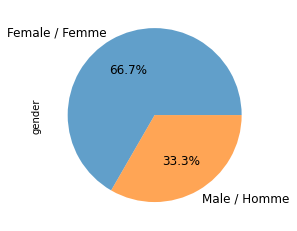

In [ ]:
ratio_pie('gender')

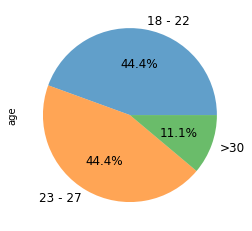

In [ ]:
ratio_pie('age')

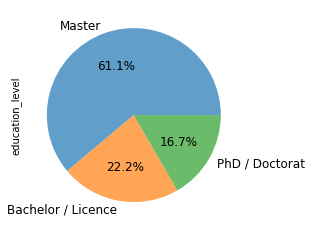

In [ ]:
ratio_pie('education_level')

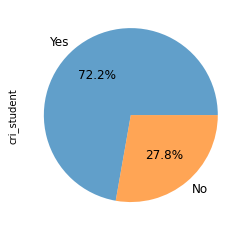

In [ ]:
ratio_pie('cri_student')

Percentage Ratio:
Female / Femme    66.666667
Male / Homme      33.333333
Name: gender, dtype: float64


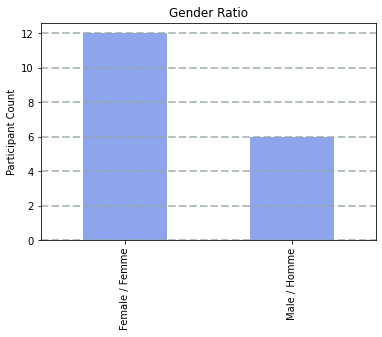

In [ ]:
ratio('gender','royalblue')

Percentage Ratio:
Master                61.111111
Bachelor / Licence    22.222222
PhD / Doctorat        16.666667
Name: education_level, dtype: float64


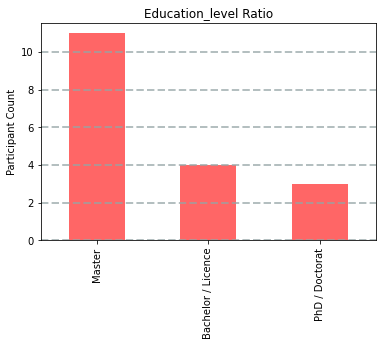

In [ ]:
ratio('education_level','red')

Percentage Ratio:
Yes    72.222222
No     27.777778
Name: cri_student, dtype: float64


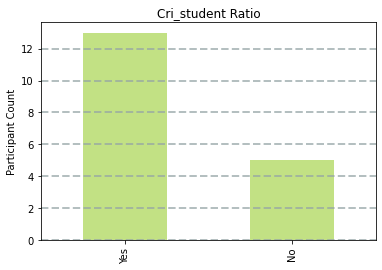

In [ ]:
ratio('cri_student','yellowgreen')

Percentage Ratio:
18 - 22    44.444444
23 - 27    44.444444
>30        11.111111
Name: age, dtype: float64


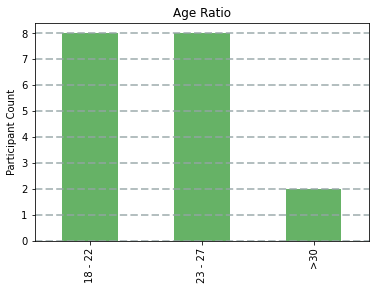

In [ ]:
ratio('age','green')

> **Question 2** : What is the average sleep quality score(3 weeks) of those who are exposed to daily stress?

In [81]:
df.sort_index(inplace=True)
df_week1.sort_index(inplace=True)
df_week2.sort_index(inplace=True)
df_week3.sort_index(inplace=True)

In [82]:
df['week1_score'] = df_week1['sleeping_quality_score']
df['week2_score'] = df_week2['sleeping_quality_score']
df['week3_score'] = df_week3['sleeping_quality_score']

In [83]:
df['avg_score'] = (df['week1_score'] +df['week2_score']++df['week3_score']+df['sleeping_quality_score'])/3

In [84]:
s_avg_score = df.loc[df['stress_level']== 'Everyday / Tous les jours']

In [85]:
sq_with_stress = round(s_avg_score['avg_score'].mean())

In [86]:
perc_st = 100-(((sq_with_stress/9)*100))
print('Sleeping quality averege percentage who got stress everyday: %'+ str(perc_st) )

Sleeping quality averege percentage who got stress everyday: %44.44444444444444


In [87]:
# to visualise but with anonymised names

df.index = ['p1', 'p2','p3', 'p4', 'p5', 'p6',
               'p7', 'p8','p9', 'p10','p11', 'p12','p13',
              'p14','p15','p16', 'p17', 'p18' ]

Stress level fairly effect upon our participants sleeping.



> **Question3** : What is the distribution of average sleeping quality score(%)?

In [92]:
df['avg_score_perc'] = 100-((df['avg_score']/9)*100)
df['avg_score_perc'].head()

p1     92.592593
p2     59.259259
p3    100.000000
p4     74.074074
p5     70.370370
Name: avg_score_perc, dtype: float64

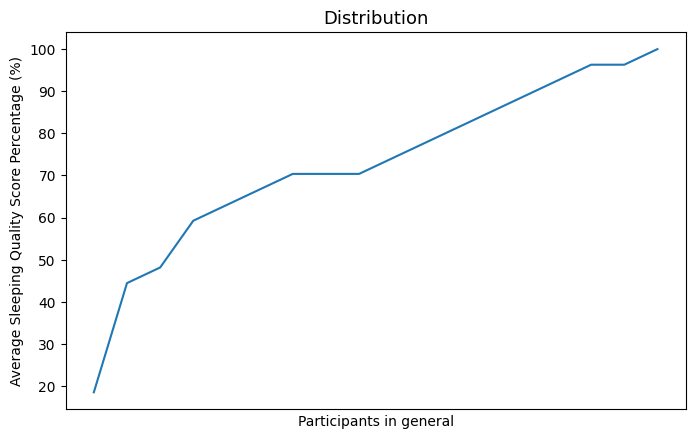

In [91]:
plt.figure(figsize=(8,5), dpi = 100)
plt.xlabel('Participants in general', fontsize = 10)
plt.ylabel('Average Sleeping Quality Score Percentage (%)', fontsize=10)
plt.title('Distribution', fontsize=13)
plt.plot(sorted(df['avg_score_perc']))
plt.xticks([])
plt.show()

> **Question 4** : What is the corrolation between parameters and sleeping quality?

**We have to chnage all values into numeric values to see corralation and it is going to help us for ML in future.**

In [ ]:
# To not change our intial data set  which is all string and orginal we will copy our dataset for chnage numerical values
df_numeric =  df.copy()
df_numeric

age          gender     education_level cri_student      alone  \
p1       >30    Male / Homme              Master         Yes  Yes / Oui   
p2   23 - 27  Female / Femme              Master          No   No / Non   
p3   23 - 27  Female / Femme              Master         Yes  Yes / Oui   
p4   18 - 22    Male / Homme  Bachelor / Licence         Yes   No / Non   
p5   23 - 27  Female / Femme      PhD / Doctorat          No  Yes / Oui   
p6   18 - 22    Male / Homme  Bachelor / Licence         Yes   No / Non   
p7   18 - 22  Female / Femme              Master         Yes  Yes / Oui   
p8   18 - 22  Female / Femme  Bachelor / Licence         Yes   No / Non   
p9   18 - 22  Female / Femme              Master         Yes   No / Non   
p10      >30    Male / Homme              Master         Yes  Yes / Oui   
p11  23 - 27  Female / Femme              Master         Yes   No / Non   
p12  18 - 22  Female / Femme  Bachelor / Licence         Yes   No / Non   
p13  18 - 22  Female / Femme              Master          No   No / Non   
p14  23 - 27  Female / Femme      PhD / Doctorat          No  Yes / Oui   
p15  23 - 27  Female / Femme              Master         Yes   No / Non   
p16  18 - 22  Female / Femme              Master         Yes   No / Non   
p17  23 - 27    Male / Homme      PhD / Doctorat          No  Yes / Oui   
p18  23 - 27    Male / Homme              Master         Yes   No / Non   

                                              have_pet  screen_time  \
p1                                            No / Non         13.0   
p2                                            No / Non          8.0   
p3                                            No / Non          7.0   
p4   Yes and it doesn't require to go out / Oui, un...          6.0   
p5                                            No / Non          9.0   
p6   Yes and it doesn't require to go out / Oui, un...          8.0   
p7                                            No / Non         12.0   
p8   Yes and it doesn't require to go out / Oui, un...          6.0   
p9   Yes and it requires to go out (e.g. dog) / Oui...         10.0   
p10                                           No / Non          6.0   
p11                                           No / Non          9.0   
p12  Yes and it doesn't require to go out / Oui, un...          3.0   
p13                                           No / Non          9.0   
p14                                           No / Non          8.0   
p15                                           No / Non          7.0   
p16                                           No / Non          6.0   
p17                                           No / Non         10.0   
p18                                           No / Non         10.0   

                                          stress_level  sleep_time  wake_time  \
p1   Often (three or four times) / Souvent (trois o...           0          8   
p2   Often (three or four times) / Souvent (trois o...           0          8   
p3                                      Never / Jamais           0          7   
p4   Often (three or four times) / Souvent (trois o...           1          8   
p5   Often (three or four times) / Souvent (trois o...           0          7   
p6   Often (three or four times) / Souvent (trois o...           0          8   
p7   Often (three or four times) / Souvent (trois o...          23          8   
p8                           Everyday / Tous les jours          22          8   
p9   Often (three or four times) / Souvent (trois o...           3         12   
p10                          Everyday / Tous les jours           1          8   
p11  Often (three or four times) / Souvent (trois o...          23          8   
p12  A few times (once or twice) / Quelques fois (u...          23          8   
p13  Often (three or four times) / Souvent (trois o...           3          9   
p14  Often (three or four times) / Souvent (trois o...           0          8   
p15  Often (three 

In [ ]:
# Looking age column unique values 
df_numeric['age'].unique()

array(['>30', '23 - 27', '18 - 22'], dtype=object)

In [ ]:
#Changing values to numerical for better analyze
df_numeric.loc[ df_numeric['age'] == '<18', 'age'] = 0
df_numeric.loc[ df_numeric['age'] == '18 - 22', 'age'] = 1
df_numeric.loc[ df_numeric['age'] == '23 - 27', 'age'] = 2
df_numeric.loc[ df_numeric['age'] == '28 - 30', 'age'] = 3
df_numeric.loc[ df_numeric['age'] == '>30', 'age'] = 4
df_numeric.age = df_numeric.age.astype(int) 

In [ ]:
df_numeric.head()

age          gender     education_level cri_student      alone  \
p1    4    Male / Homme              Master         Yes  Yes / Oui   
p2    2  Female / Femme              Master          No   No / Non   
p3    2  Female / Femme              Master         Yes  Yes / Oui   
p4    1    Male / Homme  Bachelor / Licence         Yes   No / Non   
p5    2  Female / Femme      PhD / Doctorat          No  Yes / Oui   

                                             have_pet  screen_time  \
p1                                           No / Non         13.0   
p2                                           No / Non          8.0   
p3                                           No / Non          7.0   
p4  Yes and it doesn't require to go out / Oui, un...          6.0   
p5                                           No / Non          9.0   

                                         stress_level  sleep_time  wake_time  \
p1  Often (three or four times) / Souvent (trois o...           0          8   
p2  Often (three or four times) / Souvent (trois o...           0          8   
p3                                     Never / Jamais           0          7   
p4  Often (three or four times) / Souvent (trois o...           1          8   
p5  Often (three or four times) / Souvent (trois o...           0          7   

    ...  times_of_wake  in_france  \
p1  ...              0      Italy   
p2  ...              3  Yes / Oui   
p3  ...              0  Yes / Oui   
p4  ...              1  Yes / Oui   
p5  ...              2  Yes / Oui   

                                     time_fall_asleep hours_of_sleep  \
p1  Instantly - less than 15 min / Instantanément ...              8   
p2                           More than 1h / Plus d'1h              8   
p3  Instantly - less than 15 min / Instantanément ...              7   
p4                  30 min to 1h / De 30 minutes à 1h              7   
p5                  15 to 30 min / De 15 à 30 minutes              7   

   sleeping_quality_score  week1_score  week2_score  week3_score  avg_score  \
p1                      0            1            0            1   0.666667   
p2                      5            3            1            2   3.666667   
p3                      0            0            0            0   0.000000   
p4                      2            1            1            3   2.333333   
p5                      2            2            2            2   2.666667   

    avg_score_perc  
p1       92.592593  
p2       59.259259  
p3      100.000000  
p4       74.074074  
p5       70.370370  

[5 rows x 22 columns]

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, p1 to p18
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     18 non-null     int64  
 1   gender                  18 non-null     object 
 2   education_level         18 non-null     object 
 3   cri_student             18 non-null     object 
 4   alone                   18 non-null     object 
 5   have_pet                18 non-null     object 
 6   screen_time             18 non-null     float64
 7   stress_level            18 non-null     object 
 8   sleep_time              18 non-null     int64  
 9   wake_time               18 non-null     int64  
 10  time_outside            18 non-null     int64  
 11  meeting_friends         18 non-null     int64  
 12  times_of_wake           18 non-null     int64  
 13  in_france               18 non-null     object 
 14  time_fall_asleep        18 non-null     object 

In [ ]:
# We did age column into the numeric values. Now we will go on with gender
df_numeric.loc[ df_numeric['gender'] == 'Female / Femme','gender'] = 0
df_numeric.loc[ df_numeric['gender'] == 'Male / Homme','gender'] = 1
df_numeric.loc[ df_numeric['gender'] == 'Prefer not to say / Préfère ne pas se prononcer', 'gender'] = 2
df_numeric.gender = df_numeric.gender.astype(int) 

In [ ]:
# education_level
df_numeric['education_level'].unique()

array(['Master', 'Bachelor / Licence', 'PhD / Doctorat'], dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['education_level'] == 'Master','education_level'] = 0
df_numeric.loc[ df_numeric['education_level'] == 'PhD / Doctorat','education_level'] = 1
df_numeric.loc[ df_numeric['education_level'] == 'Postdoc', 'education_level'] = 2
df_numeric.loc[ df_numeric['education_level'] == 'Bachelor / Licence', 'education_level'] = 3
df_numeric.education_level = df_numeric.education_level.astype(int) 

In [ ]:
# cri_student
df_numeric['cri_student'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['cri_student'] == 'No','cri_student'] = 0
df_numeric.loc[ df_numeric['cri_student'] == 'Yes','cri_student'] = 1
df_numeric.education_level = df_numeric.education_level.astype(int)

In [ ]:
df_numeric['alone'].unique()


array(['Yes / Oui', 'No / Non'], dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['alone'] == 'No / Non','alone'] = 0
df_numeric.loc[ df_numeric['alone'] == 'Yes / Oui','alone'] = 1
df_numeric.loc[ df_numeric['alone'] == "Student Residence (I guess that's no)",'alone'] = 2
df_numeric.loc[ df_numeric['alone'] == 'En résidence universitaire','alone'] = 3
df_numeric.loc[ df_numeric['alone'] == 'Residence','alone'] = 4
df_numeric.alone = df_numeric.alone.astype(int)

In [ ]:
df_numeric['have_pet'].unique()

array(['No / Non',
       "Yes and it doesn't require to go out / Oui, un animal qui ne nécessite pas de sortir",
       'Yes and it requires to go out (e.g. dog) / Oui, un animal qui nécessite de sortir (comme un chien)'],
      dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['have_pet'] == 'No / Non','have_pet'] = 0
df_numeric.loc[ df_numeric['have_pet'] == "Yes and it doesn't require to go out / Oui, un animal qui ne nécessite pas de sortir",'have_pet'] = 1
df_numeric.loc[ df_numeric['have_pet'] == 'Yes and it requires to go out (e.g. dog) / Oui, un animal qui nécessite de sortir (comme un chien)','have_pet'] = 2
df_numeric.have_pet = df_numeric.have_pet.astype(int)

In [ ]:
df_numeric['stress_level'].unique()

array(['Often (three or four times) / Souvent (trois ou quatre fois)',
       'Never / Jamais', 'Everyday / Tous les jours',
       'A few times (once or twice) / Quelques fois (une fois ou deux)'],
      dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['stress_level'] == 'Often (three or four times) / Souvent (trois ou quatre fois)','stress_level'] = 0
df_numeric.loc[ df_numeric['stress_level'] == 'Never / Jamais','stress_level'] = 1
df_numeric.loc[ df_numeric['stress_level'] == 'A few times (once or twice) / Quelques fois (une fois ou deux)','stress_level'] = 2
df_numeric.loc[ df_numeric['stress_level'] == 'Everyday / Tous les jours','stress_level'] = 3
df_numeric.stress_level = df_numeric.stress_level.astype(int)

In [ ]:
df_numeric['in_france'].unique()

array(['Italy', 'Yes / Oui', 'Moved in France from Japan on November 29'],
      dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['in_france'] == 'Yes / Oui','in_france'] = 0
df_numeric.loc[ df_numeric['in_france'] == 'Moved in France from Japan on November 29','in_france'] = 1
df_numeric.loc[ df_numeric['in_france'] == 'Italy','in_france'] = 1
df_numeric.in_france = df_numeric.in_france.astype(int)

In [ ]:
df_numeric['time_fall_asleep'].unique()


array(['Instantly - less than 15 min / Instantanément - moins de 15 minutes',
       "More than 1h / Plus d'1h", '30 min to 1h / De 30 minutes à 1h',
       '15 to 30 min / De 15 à 30 minutes'], dtype=object)

In [ ]:
df_numeric.loc[ df_numeric['time_fall_asleep'] == 'Instantly - less than 15 min / Instantanément - moins de 15 minutes','time_fall_asleep'] = 0
df_numeric.loc[ df_numeric['time_fall_asleep'] == "More than 1h / Plus d'1h",'time_fall_asleep'] = 1
df_numeric.loc[ df_numeric['time_fall_asleep'] == '30 min to 1h / De 30 minutes à 1h' ,'time_fall_asleep'] = 2
df_numeric.loc[ df_numeric['time_fall_asleep'] == '15 to 30 min / De 15 à 30 minutes' ,'time_fall_asleep'] = 3
df_numeric.time_fall_asleep = df_numeric.time_fall_asleep.astype(int)

### Creating Social Factor Score
> Alone, does not have a pet, does not meet friends : 0 score
>
> Not alone, does not have a pet, does not meet friends : 1 score
>
> Alone, have a pet, does not meet friends : 1 score
>
> Alone, does not have a pet, meet friends(more than 2 times) : 1 score
>
> Not alone, have a pet, does not meet friends : 2 score
>
> Not alone, does not have a pet, meet friends(more than 2 times) : 2 score
> 
> Alone, have a pet, meet friends(more than 2 times) : 2 score
>
> Not alone, have a pet, meet friends(more than 2 times) : 3 score

In [ ]:
df_numeric['socialization_factor'] = 0
for index, row in df_numeric.iterrows():
    if row['alone'] == 1:
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor']
    if row['have_pet'] == 1 or row['have_pet'] == 2 :
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor']
    if row['meeting_friends'] > 2:
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor'] 

In [ ]:
df_num_new = df_numeric.copy()
df_num_new = df_num_new.drop(['sleep_time','wake_time','avg_score_perc','sleeping_quality_score','week1_score','week2_score', 'week3_score','gender','education_level','cri_student','alone','have_pet', 'meeting_friends', 'in_france'],axis = 1)

In [ ]:
print(df_num_new)

     age  screen_time  stress_level  time_outside  times_of_wake  \
p1     4         13.0             0             1              0   
p2     2          8.0             0             1              3   
p3     2          7.0             1             8              0   
p4     1          6.0             0             0              1   
p5     2          9.0             0             2              2   
p6     1          8.0             0             0              0   
p7     1         12.0             0             0              0   
p8     1          6.0             3             0              2   
p9     1         10.0             0             2              3   
p10    4          6.0             3             1              2   
p11    2          9.0             0             1              1   
p12    1          3.0             2             1              0   
p13    1          9.0             0             0              1   
p14    2          8.0             0             

Text(0.5, 1.0, 'Correlation')

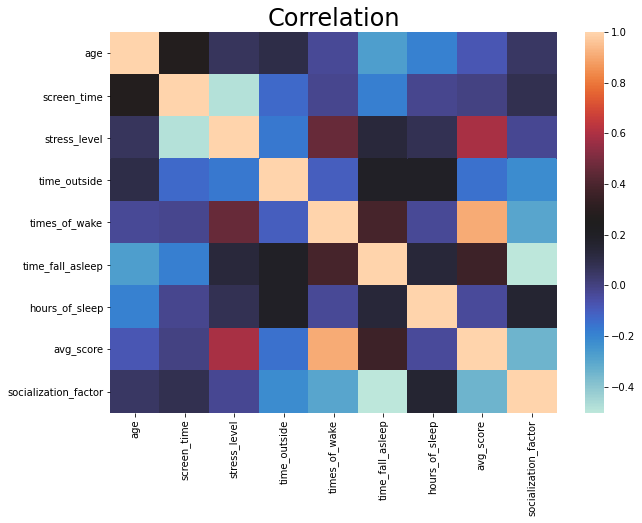

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 

sns.heatmap(df_num_new.corr(), cmap='icefire',ax=ax)
plt.title('Correlation', fontsize=24)

In [ ]:
print("Corrlation values with average of sleeping quality score")
df_num_new.drop("avg_score", axis=1).apply(lambda x: x.corr(df_num_new.avg_score))

Corrlation values with average of sleeping quality score


age                    -0.079771
screen_time            -0.001442
stress_level            0.589795
time_outside           -0.145414
times_of_wake           0.911490
time_fall_asleep        0.362368
hours_of_sleep         -0.035074
socialization_factor   -0.340412
dtype: float64

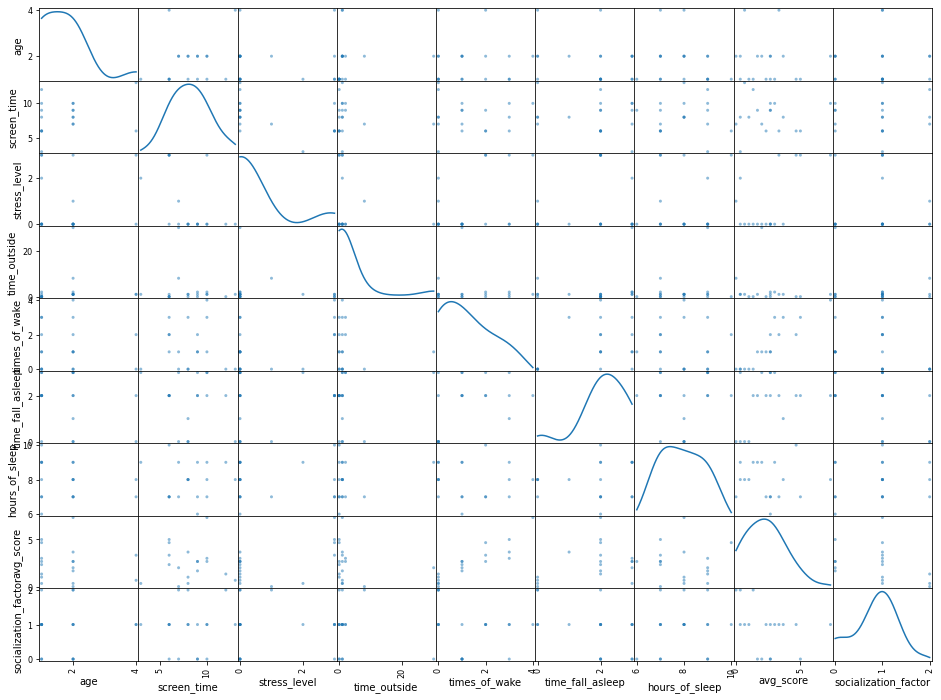

In [ ]:
pd.plotting.scatter_matrix(df_num_new, figsize=(16, 12), diagonal='kde')
plt.show()

In [ ]:
df_compare = df[['sleeping_quality_score']].copy()
df_compare.reset_index(inplace = True) 
df_compare['week']= 'week0'
add_1 = df[['week1_score']].copy()
add_1 = add_1.rename(columns={'week1_score':'sleeping_quality_score'})
add_1['week']= 'week1'
add_1.reset_index(inplace = True) 
add_2 = df[['week2_score']].copy()
add_2['week']= 'week2'
add_2 = add_2.rename(columns={'week2_score':'sleeping_quality_score'})
add_2.reset_index(inplace = True) 
add_3 = df[['week3_score']].copy()
add_3['week']= 'week3'
add_3 = add_3.rename(columns={'week3_score':'sleeping_quality_score'})
add_3.reset_index(inplace = True) 

In [ ]:
df_compare = df_compare.append(add_1,ignore_index = True) 
df_compare = df_compare.append(add_2,ignore_index = True)
df_compare = df_compare.append(add_3,ignore_index = True)

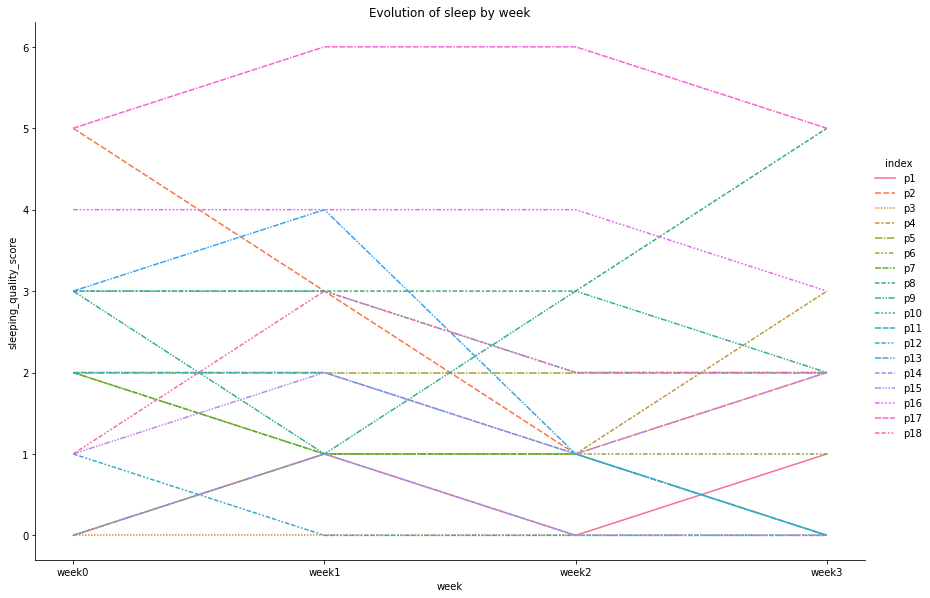

In [ ]:
sns.relplot(x= 'week', y='sleeping_quality_score', data=df_compare,kind='line', hue='index',style="index",
ci=None, height=8, aspect=1.5).set(title = 'Evolution of sleep by week')

In [ ]:
df_numeric.head()

age  gender  education_level cri_student  alone  have_pet  screen_time  \
p1    4       1                0           1      1         0         13.0   
p2    2       0                0           0      0         0          8.0   
p3    2       0                0           1      1         0          7.0   
p4    1       1                3           1      0         1          6.0   
p5    2       0                1           0      1         0          9.0   

    stress_level  sleep_time  wake_time  ...  in_france  time_fall_asleep  \
p1             0           0          8  ...          1                 0   
p2             0           0          8  ...          0                 1   
p3             1           0          7  ...          0                 0   
p4             0           1          8  ...          0                 2   
p5             0           0          7  ...          0                 3   

    hours_of_sleep  sleeping_quality_score  week1_score  week2_score  \
p1               8                       0            1            0   
p2               8                       5            3            1   
p3               7                       0            0            0   
p4               7                       2            1            1   
p5               7                       2            2            2   

    week3_score  avg_score  avg_score_perc  socialization_factor  
p1            1   0.666667       92.592593                     1  
p2            2   3.666667       59.259259                     1  
p3            0   0.000000      100.000000                     2  
p4            3   2.333333       74.074074                     1  
p5            2   2.666667       70.370370                     1  

[5 rows x 23 columns]

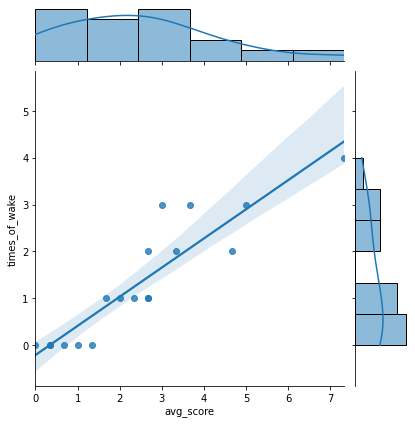

In [ ]:
sns.jointplot(x = "avg_score", y = "times_of_wake", data = df_numeric, kind = "reg");

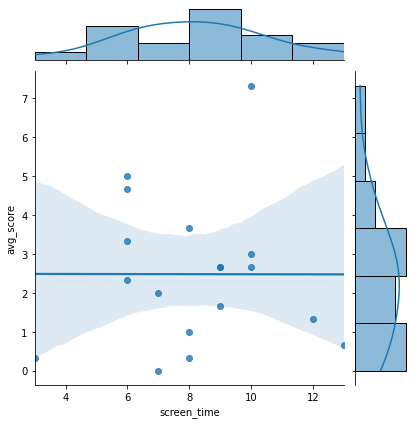

In [ ]:
sns.jointplot(x = "screen_time", y = "avg_score", data = df_numeric, kind = "reg");

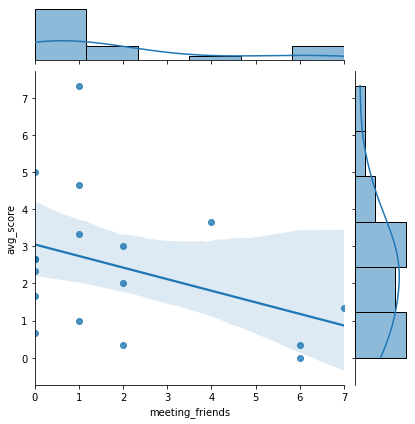

In [ ]:
sns.jointplot(x = "meeting_friends", y = "avg_score", data = df_numeric, kind = "reg");

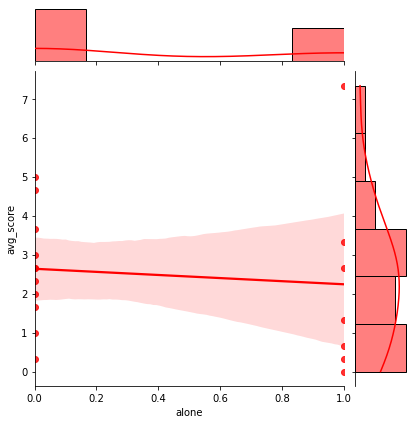

In [ ]:
sns.jointplot(x = "alone", y = "avg_score", data = df_numeric, kind = "reg",color="red");


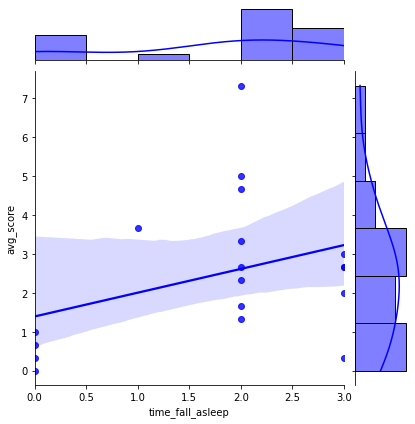

In [ ]:
sns.jointplot(x = "time_fall_asleep", y = "avg_score", data = df_numeric, kind = "reg",color="blue");


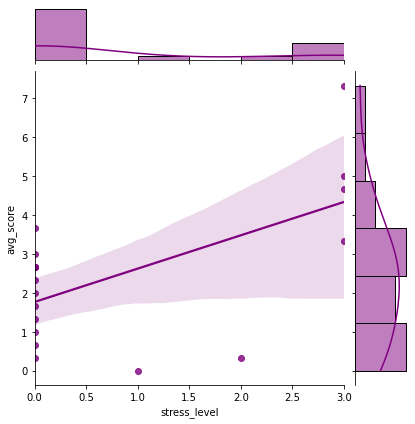

In [ ]:
sns.jointplot(x = "stress_level", y = "avg_score", data = df_numeric, kind = "reg",color="purple");

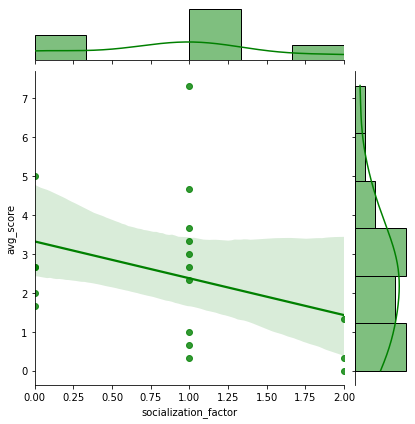

In [ ]:

sns.jointplot(x = "socialization_factor", y = "avg_score", data = df_numeric, kind = "reg",color="green");

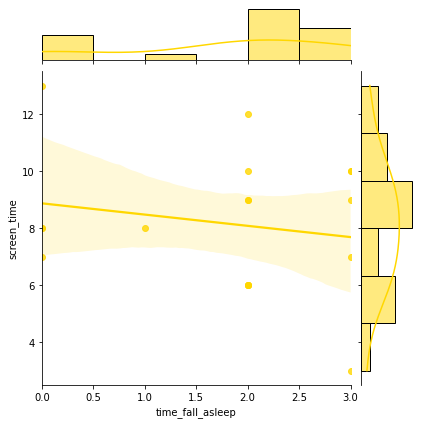

In [ ]:
sns.jointplot(x = "time_fall_asleep", y = "screen_time", data = df_numeric, kind = "reg",color="gold");